# Import libraries

In [240]:
import numpy as np
import pandas as pd
import os

# Step 1: Data Preparation

This dataset has more than 15000 data points. Let’s take out 1000 data points out from this dataset that we can use to test real-time similar to what we did in Studio 4. To do this:

## 1) First you need to shuffle the dataset

In [299]:
print(os.getcwd())

/Users/phongporter/Documents/GITHUB/COS40007/week 4/dataset_portfolio


In [300]:
os.chdir('/Users/phongporter/Documents/GITHUB/COS40007/week 4/dataset_portfolio')

In [301]:
# Load csv into dataframe
df_vegamite = pd.read_csv('vegemite.csv')

In [302]:
# Shuffle the dataset
shuffled_df_vegamite = df_vegamite.sample(n=len(df_vegamite))

# Reset the index
shuffled_df_vegamite = shuffled_df_vegamite.reset_index(drop=True)

## 2) Randomly take out 1000 data points (rows) such as way that each class in those 1000 samples has near equal distribution (e.g. at least 300 samples from each class)

In [303]:
# 1000 samples has near equal distribution of classes (1000/3 = 333.33 ~ 333, 334, 333)
thousand_data_points_1 = shuffled_df_vegamite.sample(n=333, random_state=1)
thousand_data_points_2 = shuffled_df_vegamite.sample(n=334, random_state=1)
thousand_data_points_3 = shuffled_df_vegamite.sample(n=333, random_state=1)

# Concatenate the 3 data points
thousand_data_points = pd.concat([thousand_data_points_1, thousand_data_points_2, thousand_data_points_3])

# Remaining data points
remaining_data_points = shuffled_df_vegamite.drop(thousand_data_points.index)

# Save the data points
thousand_data_points.to_csv('thousand_data_points.csv', index=False)

## Use the remaining 14000+ data points to train your ML model.

## For constructing features answer the following question and fix if you find such problem in the dataset

### 1) Does the dataset have any constant value column. If yes, then remove them

In [304]:
from sklearn.model_selection import train_test_split

In [305]:
X = remaining_data_points.iloc[:, :-1]
y = remaining_data_points.iloc[:, -1]

In [306]:
constant_features = remaining_data_points.columns[remaining_data_points.nunique() == 1]
print(constant_features)

Index(['TFE Steam temperature SP', 'TFE Product out temperature'], dtype='object')


In [307]:
# Remove the constant feature from the dataset
remaining_data_points = remaining_data_points.loc[:, remaining_data_points.nunique() > 1]

### 2) Does the dataset have any column with few integer values? If yes, then convert them to categorial feature.

In [308]:
few_unique_values_columns = [col for col in X.columns if X[col].nunique() < 10]
print(few_unique_values_columns)


['FFTE Feed tank level SP', 'TFE Steam temperature SP', 'FFTE Pump 1', 'FFTE Pump 1 - 2', 'FFTE Pump 2', 'TFE Motor speed', 'TFE Product out temperature']


In [309]:
X[few_unique_values_columns] = X[few_unique_values_columns].astype('category')
print(X.dtypes)

FFTE Feed tank level SP          category
FFTE Production solids SP         float64
FFTE Steam pressure SP            float64
TFE Out flow SP                   float64
TFE Production solids SP          float64
TFE Vacuum pressure SP            float64
TFE Steam pressure SP             float64
TFE Steam temperature SP         category
FFTE Feed flow SP                 float64
FFTE Out steam temp SP            float64
Extract tank Level                float64
Extract tank Out flow PV          float64
FFTE Discharge density            float64
FFTE Discharge solids             float64
FFTE Feed flow rate PV            float64
FFTE Feed tank level PV           float64
FFTE Heat temperature 1           float64
FFTE Heat temperature 2           float64
FFTE Heat temperature 3           float64
FFTE Out steam temp PV            float64
FFTE Production solids PV         float64
FFTE Pump 1                      category
FFTE Pump 1 - 2                  category
FFTE Pump 2                      c

### 3) Does the class have a balanced distribution? If not then perform necessary undersampling and oversampling or adjust class weights.


In [310]:
class_count = y.value_counts()
print(class_count)

Class
2    7375
1    4940
0    2588
Name: count, dtype: int64


In [311]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [312]:
# Apply both
smote_tomek = SMOTETomek(smote=SMOTE(random_state=1), tomek=TomekLinks(sampling_strategy='majority'))

# Fit the resampled data
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Split the resampled data into training
X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=1)


### 4) Do you find any composite feature through exploration? If so, then add some composite feature in the dataset.

Possibilities:
1. Efficiency ratios: use ratios to measure effectively in operation under various pressure conditions. 
2. Difference features: there is a representing difference in showing feature between set points(SP) and actual process values (PV)
3. Multiplicative features: the significant variable product becomes the feature, in which capturing the interactions among various process members. 

In [313]:
remaining_data_points.head()

,FFTE Feed tank level SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,FFTE Feed flow SP,FFTE Out steam temp SP,Extract tank Level,...,TFE Motor speed,TFE Out flow PV,TFE Production solids PV,TFE Production solids density,TFE Steam pressure PV,TFE Steam temperature,TFE Tank level,TFE Temperature,TFE Vacuum pressure PV,Class
0,50.0,40.84,110.00,2242.41,37.5,-73.11,120.0,9400.0,49.28,42.35,...,80.0,2641.37,68.18,1.22,125.03,67.83,84.33,75.0,-70.00,0
1,25.0,43.00,135.61,2991.88,71.0,-50.00,2.0,14000.0,50.00,15.33,...,20.0,4218.55,0.00,1.08,1.98,74.29,78.18,74.0,1.94,2
2,50.0,41.50,123.73,2038.55,67.0,-64.07,125.0,9400.0,50.00,57.23,...,80.0,1532.43,54.33,1.22,120.23,72.94,57.69,73.0,-70.36,1
3,50.0,43.00,94.00,2846.51,75.0,-60.22,120.0,10200.0,50.00,47.62,...,80.0,1333.98,68.18,1.17,119.58,64.76,46.29,70.0,-77.74,1
4,50.0,41.50,105.00,1725.30,37.5,-46.50,120.0,8940.0,49.88,69.35,...,80.0,2339.82,41.72,0.93,119.26,71.98,83.94,72.0,-76.67,2


In [314]:

# Efficiency ratios
remaining_data_points['TFE_Production_Solids_Efficiency'] = remaining_data_points['TFE Production solids SP'] / remaining_data_points['TFE Steam pressure SP']
# Difference features
remaining_data_points['TFE_Feed_Tank_Level_Diff'] = remaining_data_points['FFTE Feed tank level SP'] - remaining_data_points['TFE Tank level']
remaining_data_points['TFE_Steam_Pressure_Diff'] = remaining_data_points['TFE Steam pressure SP'] - remaining_data_points['TFE Steam pressure PV']
# Multiplicative features
remaining_data_points['TFE_Flow_Pressure_Product'] = remaining_data_points['FFTE Feed flow SP'] * remaining_data_points['TFE Steam pressure SP']

In [315]:
remaining_data_points.head()

,FFTE Feed tank level SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,FFTE Feed flow SP,FFTE Out steam temp SP,Extract tank Level,...,TFE Steam pressure PV,TFE Steam temperature,TFE Tank level,TFE Temperature,TFE Vacuum pressure PV,Class,TFE_Production_Solids_Efficiency,TFE_Feed_Tank_Level_Diff,TFE_Steam_Pressure_Diff,TFE_Flow_Pressure_Product
0,50.0,40.84,110.00,2242.41,37.5,-73.11,120.0,9400.0,49.28,42.35,...,125.03,67.83,84.33,75.0,-70.00,0,0.3125,-34.33,-5.03,1128000.0
1,25.0,43.00,135.61,2991.88,71.0,-50.00,2.0,14000.0,50.00,15.33,...,1.98,74.29,78.18,74.0,1.94,2,35.5000,-53.18,0.02,28000.0
2,50.0,41.50,123.73,2038.55,67.0,-64.07,125.0,9400.0,50.00,57.23,...,120.23,72.94,57.69,73.0,-70.36,1,0.5360,-7.69,4.77,1175000.0
3,50.0,43.00,94.00,2846.51,75.0,-60.22,120.0,10200.0,50.00,47.62,...,119.58,64.76,46.29,70.0,-77.74,1,0.6250,3.71,0.42,1224000.0
4,50.0,41.50,105.00,1725.30,37.5,-46.50,120.0,8940.0,49.88,69.35,...,119.26,71.98,83.94,72.0,-76.67,2,0.3125,-33.94,0.74,1072800.0


### 5) Finally, how many features you have in your final dataset?

In [316]:
remaining_data_points.to_csv('remaining_data_points.csv', index=False)

# Step 2: Feature selection, Model Training and Evaluation

## 6) Does the training process need all features? If not, can you apply some feature selection technique to remove some features? Justify your reason of feature selection

In [319]:
# View the number of features in the dataset
num_features = X_resampled.shape[1]
print(f'The number of features in the dataset: {num_features}')

The number of features in the dataset: 46


## 7) Train multiple ML models (at least 5 including DecisionTreeClassifier) with your selected features.

In [320]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

In [323]:
# Use pipeline to handle missing values for model that need it
mlp_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', MLPClassifier())
])

hgb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', HistGradientBoostingClassifier())
])

svm_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', svm.SVC())
])

rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier())
])

# Models to train
models = {
    'Random Forest': rf_pipeline,
    'Decision Tree': DecisionTreeClassifier(),
    'Hist Gradient Boosting': HistGradientBoostingClassifier(),
    'MLP': mlp_pipeline,
    'SVM': svm_pipeline,
}

# Train and evaluate the models
results = {}
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    predictions = model.predict(X_test)
    results[model_name] = {
        'report': classification_report(y_test, predictions, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, predictions)
    }

## 8) Evaluate each model with classification report and confusion matrix

In [324]:
# Display the results
results

{'Random Forest': {'report': {'0': {'precision': 0.9925474254742548,
    'recall': 0.9986366734832992,
    'f1-score': 0.9955827387020048,
    'support': 1467.0},
   '1': {'precision': 0.9959072305593452,
    'recall': 0.9898305084745763,
    'f1-score': 0.9928595715742944,
    'support': 1475.0},
   '2': {'precision': 0.9966101694915255,
    'recall': 0.9966101694915255,
    'f1-score': 0.9966101694915255,
    'support': 1475.0},
   'accuracy': 0.9950192438306543,
   'macro avg': {'precision': 0.9950216085083751,
    'recall': 0.9950257838164669,
    'f1-score': 0.9950174932559416,
    'support': 4417.0},
   'weighted avg': {'precision': 0.9950260897092519,
    'recall': 0.9950192438306543,
    'f1-score': 0.9950164694923987,
    'support': 4417.0}},
  'confusion_matrix': array([[1465,    2,    0],
         [  10, 1460,    5],
         [   1,    4, 1470]])},
 'Decision Tree': {'report': {'0': {'precision': 0.9564921821889871,
    'recall': 0.9591002044989775,
    'f1-score': 0.9577944

## 9) Compare all the models across different evaluation measures and generate a comparison table

In [325]:
import matplotlib.pyplot as plt

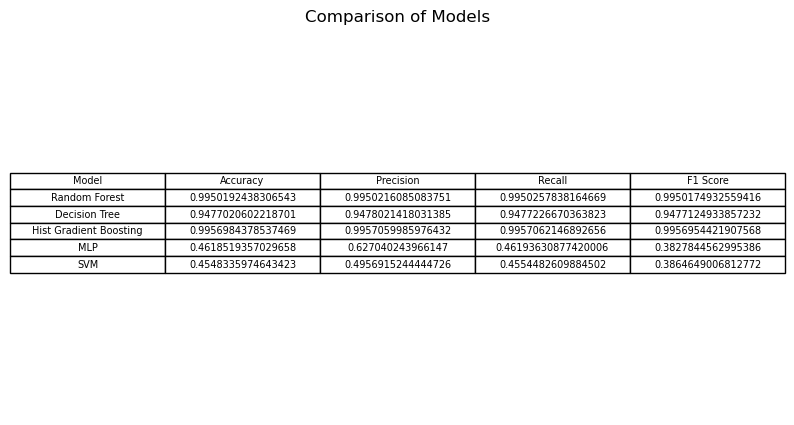

In [332]:
# Initialise the store comparison data
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Initialise find the best model
best_model = None
best_model_accuracy = 0

# Extract from the result dictionary
for model_name, model_result in results.items():
    model_names.append(model_name)
    accuracies.append(model_result['report']['accuracy'])
    precisions.append(model_result['report']['macro avg']['precision'])
    recalls.append(model_result['report']['macro avg']['recall'])
    f1_scores.append(model_result['report']['macro avg']['f1-score'])

    # Find the best model
    model_accuracy = model_result['report']['accuracy']
    if model_accuracy > best_model_accuracy:
        best_model = model_name
        best_model_accuracy = model_accuracy
    
# Create a dataframe to store the comparison data
comparison_data = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# plot table of comparison data function
def plot_table(data, title):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.axis('off')
    ax.table(cellText=data.values, colLabels=data.columns, cellLoc='center', loc='center', colLoc='center')
    plt.title(title)
    plt.show()

# Plot the comparison data
plot_table(comparison_data, 'Comparison of Models')


## 10) Now select your best performing model to use that as AI. Justify the reason of your selection

In [327]:
# Display the best model
print(f'The best model is {best_model} with an accuracy of {best_model_accuracy}')

The best model is Hist Gradient Boosting with an accuracy of 0.9956984378537469


## 11) Now save your selected model

In [333]:
import joblib as jb

In [334]:
# Check path 
print(os.getcwd())

/Users/phongporter/Documents/GITHUB/COS40007/week 4/dataset_portfolio


In [335]:
# new directory at folder results
os.chdir('/Users/phongporter/Documents/GITHUB/COS40007/week 4/')

In [336]:
# Check if folder result exists
if not os.path.exists('results'):
    os.makedirs('results')


In [337]:
ticker_data_filename = os.path.join("results", f"bestModel-{best_model}.pkl") 
jb.dump(models['Hist Gradient Boosting'], ticker_data_filename)

['results/bestModel-Hist Gradient Boosting.pkl']

# Step 3: ML to AI

## 12) Now take the 1000 rows that you have not used (we put aside at the beginning )

In [338]:
df_thousand_data_points = pd.read_csv('dataset_portfolio/thousand_data_points.csv')

## 13) Load the model

In [339]:
best_model = jb.load(ticker_data_filename)

## 14) Iteratively convert columns in each row in the format of your training feature set

In [340]:
X_test = df_thousand_data_points.drop(columns='Class', axis=1)
y_test = df_thousand_data_points['Class']

## 15) Find class prediction using the loaded model and compare with the original label

In [341]:
y_pred = best_model.predict(X_test)

## 16) Measure the performance of your best model for 1000 unseen data points

In [342]:
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

In [343]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: {confusion_matrix}')
print(f'Classification Report: {classification_report}')

Accuracy: 1.0
Confusion Matrix: [[160   0   0]
 [  0 321   0]
 [  0   0 519]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       321
           2       1.00      1.00      1.00       519

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



## 17) Now measure the performance of other model using these 1000 data points. Have you observed same result of model selection that you identified through evaluation ?

In [344]:
from sklearn.metrics import confusion_matrix, classification_report

In [345]:
# Use pipeline to handle missing values for model that need it
mlp_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', MLPClassifier())
])

hgb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', HistGradientBoostingClassifier())
])

svm_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', svm.SVC())
])

rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier())
])

# Models to train
models = {
    'Random Forest': rf_pipeline,
    'Decision Tree': DecisionTreeClassifier(),
    'Hist Gradient Boosting': HistGradientBoostingClassifier(),
    'MLP': mlp_pipeline,
    'SVM': svm_pipeline,
}


for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")

    # Train the model if needed (skip this if models are already saved/loaded)
    model.fit(X_train_resampled, y_train_resampled)  # Uncomment this if you need to fit the model

    # Predict using the model
    y_pred = model.predict(X_test)

    # Measure the performance of the current model on the unseen 1000 data points
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Print evaluation results for the current model
    print(f"\nPerformance of {model_name} on 1000 Unseen Data Points:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)

# # Display the results
# results


Evaluating Random Forest...

Performance of Random Forest on 1000 Unseen Data Points:
Accuracy: 1.0
Confusion Matrix:
 [[160   0   0]
 [  0 321   0]
 [  0   0 519]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       321
           2       1.00      1.00      1.00       519

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Evaluating Decision Tree...

Performance of Decision Tree on 1000 Unseen Data Points:
Accuracy: 0.949
Confusion Matrix:
 [[148   6   6]
 [  9 306   6]
 [  9  15 495]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       160
           1       0.94      0.95      0.94       321
           2       0.98      0.95      0.96       519

    accuracy       

# Step 4: Develop rules from ML model
In your feature set take only the columns the ends with ‘SP’ and remove others. SP are the set
points that human can control. Others are process variable (PV) that is generated by machines
and human can not control. Now generate some rules of recommended set points ranges for a
class value.
* Using only SP features generate a decisiontree model

In [346]:
df_rules = pd.read_csv('dataset_portfolio/remaining_data_points.csv')

In [347]:
sp_column = [col for col in df_rules.columns if col.endswith('SP')]
X_sp = df_rules[sp_column]
y = df_rules['Class']

decision_tree_sp = DecisionTreeClassifier(random_state=1)
decision_tree_sp.fit(X_sp, y)

DecisionTreeClassifier(random_state=1)

* Print the tree using export_text

In [348]:
from sklearn.tree import export_text

In [349]:
tree_rules = export_text(decision_tree_sp, feature_names=sp_column)
print(tree_rules)

|--- TFE Out flow SP <= 2249.11
|   |--- FFTE Steam pressure SP <= 119.98
|   |   |--- TFE Out flow SP <= 2100.70
|   |   |   |--- TFE Vacuum pressure SP <= -67.99
|   |   |   |   |--- FFTE Feed flow SP <= 9395.00
|   |   |   |   |   |--- TFE Production solids SP <= 64.25
|   |   |   |   |   |   |--- FFTE Steam pressure SP <= 103.50
|   |   |   |   |   |   |   |--- FFTE Steam pressure SP <= 94.00
|   |   |   |   |   |   |   |   |--- FFTE Feed flow SP <= 9230.00
|   |   |   |   |   |   |   |   |   |--- TFE Production solids SP <= 52.75
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- TFE Production solids SP >  52.75
|   |   |   |   |   |   |   |   |   |   |--- TFE Vacuum pressure SP <= -76.47
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- TFE Vacuum pressure SP >  -76.47
|   |   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- FF